Kaggle Link1: https://www.kaggle.com/datasets/nikhil1e9/loan-default/data

Kaggle Link2: https://www.kaggle.com/code/hassanamin/predicting-loan-default/notebook

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [36]:
data = pd.read_csv("data/loan_raw.csv")

EDA

In [4]:
data.shape

(255347, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [3]:
data.head(2)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0


In [5]:
data.groupby("Default").agg({"LoanID":"count"})


,LoanID
Default,
0,225694
1,29653


Modeling

In [7]:
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [37]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
obj_col = ['Education', 'EmploymentType', 'MaritalStatus','HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
encoding_mappings = {}
for col in obj_col:
    le.fit(data[col])
    # Store the mapping as a dictionary
    encoding_mappings[col] = {class_: idx for idx, class_ in enumerate(le.classes_)}

    data[col] = le.transform(data[col])
    
data = data.drop(['LoanID'], axis=1)

In [39]:
data.head(2)


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0


In [38]:
encoding_mappings

{'Education': {"Bachelor's": 0, 'High School': 1, "Master's": 2, 'PhD': 3},
 'EmploymentType': {'Full-time': 0,
  'Part-time': 1,
  'Self-employed': 2,
  'Unemployed': 3},
 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2},
 'HasMortgage': {'No': 0, 'Yes': 1},
 'HasDependents': {'No': 0, 'Yes': 1},
 'LoanPurpose': {'Auto': 0,
  'Business': 1,
  'Education': 2,
  'Home': 3,
  'Other': 4},
 'HasCoSigner': {'No': 0, 'Yes': 1}}

In [9]:
X = data.drop(['Default'], axis=1)
y = data['Default']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
X_train.head(2)


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
120619,63,15059,70015,739,87,3,18.43,48,0.62,3,1,2,0,1,1,1
86171,54,113722,162395,805,22,3,17.31,12,0.33,3,3,2,0,1,1,0


In [41]:
X_train.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [15]:
model1 = XGBClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
score = accuracy_score(y_pred, y_test)

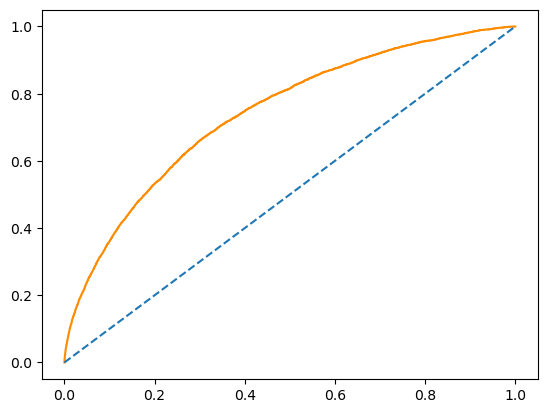

In [21]:
y_pred_proba = model1.predict_proba(X_test) 
prob_default = y_pred_proba[:, 1]
fallout, sensitivity,thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [24]:
from sklearn.metrics import classification_report
# Create a dataframe for the probabilities of default
preds_df1 = pd.DataFrame(y_pred_proba[:,1], columns = ['prob_default'])
# Reassign loan status based on the threshold
preds_df1['loan_status']=preds_df1['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
# Print the row counts for each loan status
print(preds_df1['loan_status'].value_counts())
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df1['loan_status'], target_names=target_names))

loan_status
0    62707
1     1130
Name: count, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.89      0.99      0.94     56410
     Default       0.55      0.08      0.14      7427

    accuracy                           0.89     63837
   macro avg       0.72      0.54      0.54     63837
weighted avg       0.85      0.89      0.85     63837



In [25]:
import joblib
# joblib.dump(model1, "model.pkl")


['model.pkl']

In [26]:
test_model = joblib.load("model.pkl")

In [28]:
test_model.predict(X_test).sum()

1130

In [29]:
X_train.columns


Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [34]:
for i in X_train.columns:
    print(i.lower())
    

age
income
loanamount
creditscore
monthsemployed
numcreditlines
interestrate
loanterm
dtiratio
education
employmenttype
maritalstatus
hasmortgage
hasdependents
loanpurpose
hascosigner


In [33]:
num_col = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
cat_col = ['Education',
       'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner']
for n in num_col:
    print(n, data[n].min(), data[n].max())

for c in cat_col:
    print(c, data[c].nunique(), data[c].unique())

Age 18 69
Income 15000 149999
LoanAmount 5000 249999
CreditScore 300 849
MonthsEmployed 0 119
NumCreditLines 1 4
InterestRate 2.0 25.0
LoanTerm 12 60
DTIRatio 0.1 0.9
Education 4 ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType 4 ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus 3 ['Divorced' 'Married' 'Single']
HasMortgage 2 ['Yes' 'No']
HasDependents 2 ['Yes' 'No']
LoanPurpose 5 ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner 2 ['Yes' 'No']
